In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu october 25 14:35:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus
import itertools

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


# Variables Descriptions
INCOME = "2010 Gross Domestic Product per capita in constant 2000 US$"
ALCOHOL = "2008 alcohol consumption (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"

# os.chdir('/home/sidon/dev/coursera')
out = StringIO()

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data0 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                     usecols=['country','incomeperperson',
                              'alcconsumption','lifeexpectancy'])


In [2]:
def to_num(list, data):
    for dt in list :
        data[dt] = pd.to_numeric(data[dt], 'errors=coerce')
    return data    
        

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, lbs=([' (TN)',' (FP)'],[' (FN)',' (TP)'])):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm[i, j])+lbs[i][j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [4]:
# Rename columns for clarity                                    
data0.columns = ['country','income','alcohol','life']

# converting to numeric values and parsing (numeric invalids=NaN)
data0 = to_num( ('income','alcohol','life'), data0 )

# Remove rows with nan values
data0 = data0.dropna(axis=0, how='any')

# Copy dataframe for preserve original
data1 = data0.copy()

In [5]:
# Mean, Min and Max of life expectancy
meal = data1.life.mean()
minl = data1.life.min() 
maxl = data1.life.max()

# Create categorical response variable life (Two levels based on mean)
data1['life'] = pd.cut(data0.life,[np.floor(minl),meal,np.ceil(maxl)], labels=['0','1'])
data1['life'] = data1['life'].astype('category')

In [6]:
# Mean, Min and Max of alcohol
meaa = data1.alcohol.mean()
mina = data1.alcohol.min() 
maxa = data1.alcohol.max()

# Categoriacal explanatory variable (Two levels based on mean) 
data1['alcohol'] = pd.cut(data0.alcohol,[np.floor(mina),meaa,np.ceil(maxa)], 
                          labels=[0,1])

cat1 = pd.qcut(data0.alcohol,5).cat.categories
data1["alcohol"] = pd.qcut(data0.alcohol,5,labels=['0','1','2','3','4'])
data1["alcohol"] = data1["alcohol"].astype('category')

In [7]:
# Mean, Min and Max of income
meai = data1.income.mean()
mini = data1.income.min() 
maxi = data1.income.max()

# Categoriacal explanatory variable (Two levels based on mean) 
data1['income'] = pd.cut(data0.income,[np.floor(mini),meai,np.ceil(maxi)], 
                          labels=[0,1])
data1["income"] = data1["income"].astype('category')

In [8]:
data1 = to_num( ('alcohol', 'income'), data1 )

In [9]:
predictors = data1[['alcohol', 'income']]
targets = data1.life
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

#Build model on training data
clf=RandomForestClassifier(n_estimators=25)
clf=clf.fit(pred_train,tar_train)

predictions=clf.predict(pred_test)
confusion_matrix =  sklearn.metrics.confusion_matrix(tar_test,predictions)
accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.40728949  0.59271051]


In [10]:
print ('Accuracy Score: ', accuracy,'\n')

Accuracy Score:  0.724637681159 



Confusion matrix, without normalization
[[18 10]
 [ 9 32]]


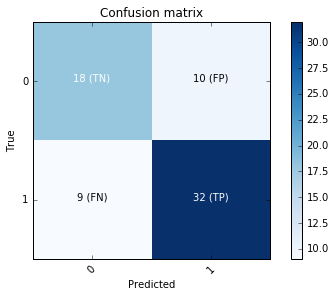

In [11]:
plot_confusion_matrix(confusion_matrix,['0','1'])

This graph represents the confusion matrix, that shows the correct and incorrect classifications of the decision tree, the labels means the life expectancy greater and less than 69 years, the horizontal labels are the predictions and the vertical are the reference (true).
the main diagonal: 16 and 34 represent the number of true negative and true positive for life expectancy and the other diagonal (values 7 and 12) represents the numbers of false negative and false positive respectively.

The accuracy score is approximately 0.72, this suggests that the decision tree model has classified 72% of the sample as either countrie with life expectancy greater or less than the mean (69 years).

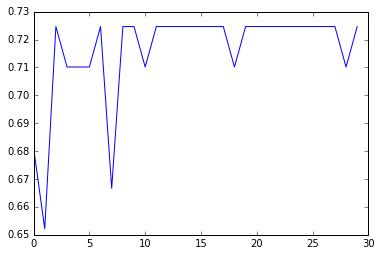

In [13]:

"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(30)
accuracy=np.zeros(30)

for idx in range(len(trees)):
   clf=RandomForestClassifier(n_estimators=idx + 1)
   clf=clf.fit(pred_train,tar_train)
   predictions=clf.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)


In [15]:
#Build model on training data for decision tree
clfdt = DecisionTreeClassifier()
clfdt = clfdt.fit(pred_train,tar_train)
from sklearn.tree import DecisionTreeClassifier

preddt=clfdt.predict(pred_test)

accuracy = sklearn.metrics.accuracy_score(tar_test, preddt)
print ('Accuracy Score for Decision Tree: ', accuracy,'\n')

Accuracy Score for Decision Tree:  0.710144927536 



In [16]:
accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)
print ('Accuracy Score for Random Forest: ', accuracy,'\n')

Accuracy Score for Random Forest:  0.724637681159 

